## Preporcesamiento de los Datos

In [1]:
import pandas as pd

# Cargar el conjunto de datos CSV en un DataFrame
ruta_archivo = r"D:\DATOS RECUPERADOS\UNIVERSIDAD DE LIMA\10. Decimo Ciclo\Seminario 1\BankSim.csv"
Modelo_Base = pd.read_csv(ruta_archivo)

# Muestra las primeras 10 filas del DataFrame Modelo_Base
print(Modelo_Base.head(10))
Modelo_Autoencoders= Modelo_Base 


   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
5     0  'C1315400589'  '3'    'F'    '28007'   'M348934600'     '28007'   
6     0   'C765155274'  '1'    'F'    '28007'   'M348934600'     '28007'   
7     0   'C202531238'  '4'    'F'    '28007'   'M348934600'     '28007'   
8     0   'C105845174'  '3'    'M'    '28007'   'M348934600'     '28007'   
9     0    'C39858251'  '5'    'F'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  

### Limpieza de Data

In [3]:
print("Unique zipCodeOri values: ",Modelo_Base.zipcodeOri.nunique())
print("Unique zipMerchant values: ",Modelo_Base.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = Modelo_Base.drop(['zipcodeOri','zipMerchant'],axis=1)
data_reduced.columns

# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

X = data_reduced.drop(['fraud'],axis=1)
y = Modelo_Base['fraud']
print(X.head(),"\n")
print(y.head())

data_reduced["category"].nunique

y[y==1].count()

Unique zipCodeOri values:  1
Unique zipMerchant values:  1
   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


7200

In [3]:
data_reduced

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0
...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,18,12,20.53,0
594639,179,3369,4,1,18,12,50.73,0
594640,179,529,2,1,31,2,22.44,0
594641,179,1083,5,2,18,12,14.46,0


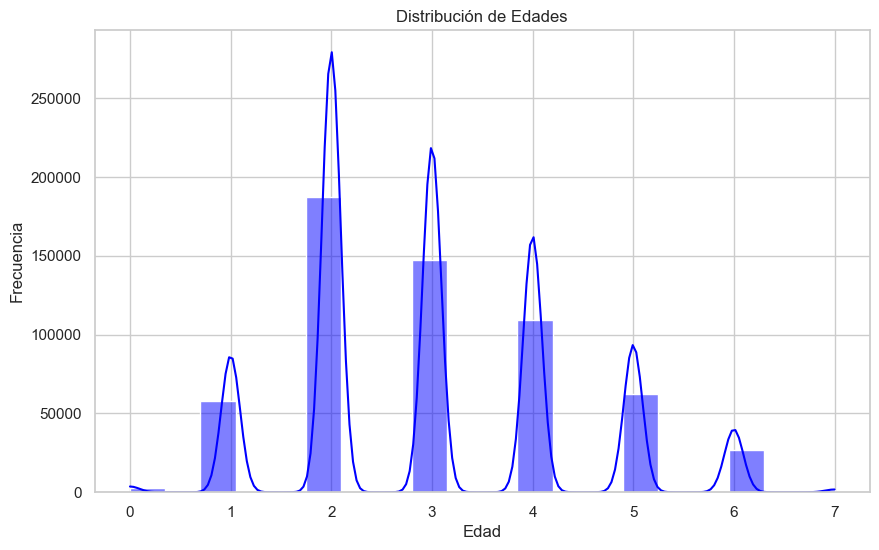

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_18868\317392036.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, x='gender', palette='viridis')


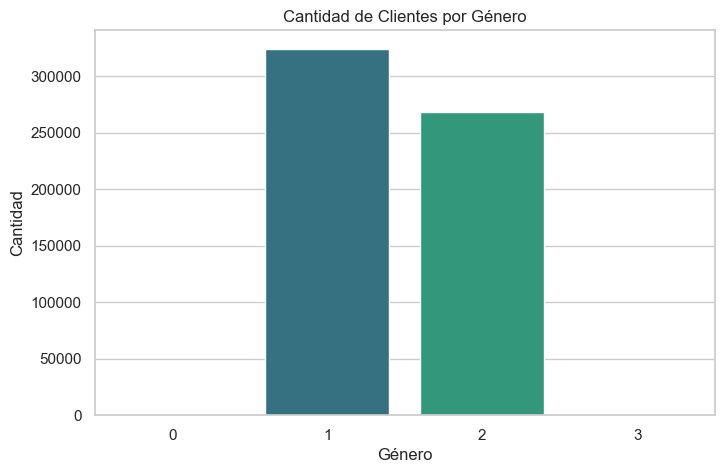

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_18868\317392036.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, y='category', palette='magma')


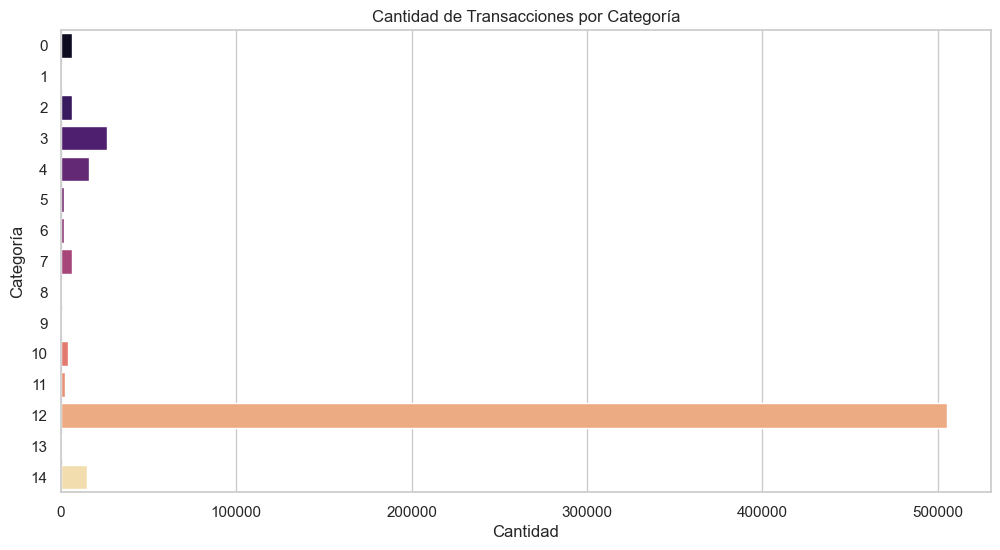

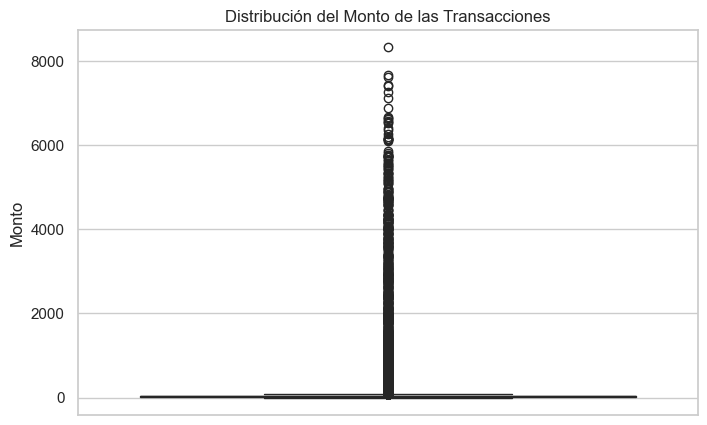

C:\Users\Alexander Cruz\AppData\Local\Temp\ipykernel_18868\317392036.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_reduced, x='fraud', palette='rocket')


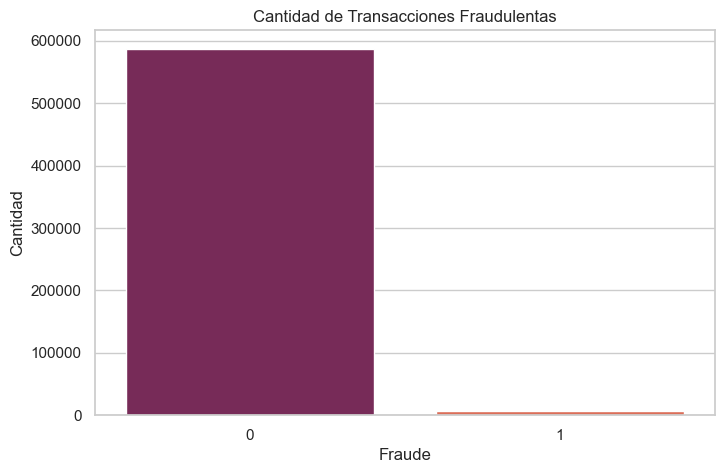

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el estilo de los gráficos
sns.set(style="whitegrid")

# Visualización de histograma para la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data_reduced['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de un gráfico de barras para la variable 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(data=data_reduced, x='gender', palette='viridis')
plt.title('Cantidad de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Visualización de un gráfico de barras para la variable 'category'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_reduced, y='category', palette='magma')
plt.title('Cantidad de Transacciones por Categoría')
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.show()

# Visualización de un diagrama de caja para la variable 'amount'
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_reduced, y='amount', color='green')
plt.title('Distribución del Monto de las Transacciones')
plt.ylabel('Monto')
plt.show()

# Visualización de un gráfico de barras para la variable 'fraud'
plt.figure(figsize=(8, 5))
sns.countplot(data=data_reduced, x='fraud', palette='rocket')
plt.title('Cantidad de Transacciones Fraudulentas')
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.show()


### Standar Scaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo 'fraud'
# Separar la variable objetivo 'fraud'
target = data_reduced['fraud']
features =data_reduced.drop(columns=['fraud'])

# Aplicar MinMaxScaler a las características
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Reintegrar la variable objetivo
Modelo_Base_scaled = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

Modelo_Base_scaled


,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.051082,0.571429,0.666667,0.612245,0.857143,0.000546,0
1,0.0,0.669667,0.285714,0.666667,0.612245,0.857143,0.004764,0
2,0.0,0.555826,0.571429,0.333333,0.367347,0.857143,0.003228,0
3,0.0,0.401362,0.428571,0.666667,0.612245,0.857143,0.002071,0
4,0.0,0.872051,0.714286,0.666667,0.612245,0.857143,0.004288,0
...,...,...,...,...,...,...,...,...
594638,1.0,0.398686,0.428571,0.333333,0.367347,0.857143,0.002465,0
594639,1.0,0.819509,0.571429,0.333333,0.367347,0.857143,0.006090,0
594640,1.0,0.128679,0.285714,0.333333,0.632653,0.142857,0.002694,0
594641,1.0,0.263440,0.714286,0.666667,0.367347,0.857143,0.001736,0


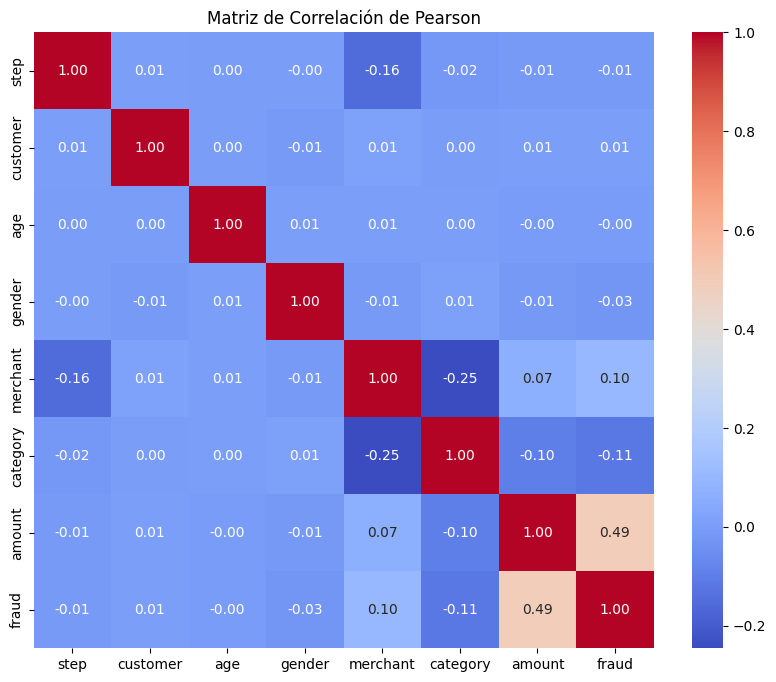

Variables más correlacionadas con 'fraud':
merchant    0.104532
category   -0.114272
amount      0.489967
Name: fraud, dtype: float64

Correlaciones positivas:
merchant    0.104532
amount      0.489967
Name: fraud, dtype: float64

Correlaciones negativas:
category   -0.114272
Name: fraud, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
Modelo_Base_Limpio = data_reduced

# Calcular la matriz de correlación de Pearson
correlation_matrix = Modelo_Base_Limpio.corr()

# Mostrar la gráfica de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Identificar las variables más correlacionadas con 'fraud'
correlation_with_fraud = correlation_matrix['fraud'].drop('fraud')

# Filtrar las correlaciones más significativas (umbral de 0.05 en valor absoluto)
most_correlated = correlation_with_fraud[abs(correlation_with_fraud) > 0.05]

print("Variables más correlacionadas con 'fraud':")
print(most_correlated)

# Separar las correlaciones positivas y negativas
positive_correlations = most_correlated[most_correlated > 0]
negative_correlations = most_correlated[most_correlated < 0]

print("\nCorrelaciones positivas:")
print(positive_correlations)

print("\nCorrelaciones negativas:")
print(negative_correlations)

In [56]:
Modelo_Base_scaled

,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.623077,0.576513,0.826632,0.685438,1.000000,0.000546,0
1,0.0,0.630769,1.000000,0.826632,0.685438,1.000000,0.004764,0
2,0.0,0.230769,0.576513,1.000000,1.000000,1.000000,0.003228,0
3,0.0,0.638462,0.782649,0.826632,0.685438,1.000000,0.002071,0
4,0.0,0.538462,0.325601,0.826632,0.685438,1.000000,0.004288,0
...,...,...,...,...,...,...,...,...
593460,1.0,0.688462,0.782649,1.000000,1.000000,1.000000,0.002465,0
593461,1.0,0.642308,0.576513,1.000000,1.000000,1.000000,0.006090,0
593462,1.0,0.626923,1.000000,1.000000,0.009615,0.011802,0.002694,0
593463,1.0,0.615385,0.325601,0.826632,1.000000,1.000000,0.001736,0


In [78]:
# Calcula la matriz de correlación
correlation_matrix = data_reduced.corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Imprime los valores de correlación uno por uno
print("\nValores de Correlación:")
for columna1 in correlation_matrix.columns:
    for columna2 in correlation_matrix.columns:
        if columna1 != columna2:
            correlacion = correlation_matrix[columna1][columna2]
            print(f"Correlación entre {columna1} y {columna2}: {correlacion:.2f}")

# Interpreta los valores de correlación
print("\nInterpretación de los Valores de Correlación:")
print("- Un valor cercano a 1 indica una correlación positiva fuerte.")
print("- Un valor cercano a -1 indica una correlación negativa fuerte.")
print("- Un valor cercano a 0 indica una correlación débil o ausente.")

# Encuentra las correlaciones más altas y más bajas
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)[len(correlation_matrix):]
min_corr = correlation_matrix.abs().unstack().sort_values(ascending=True)[0:len(correlation_matrix)-1]

print("\nCorrelaciones más altas:")
print(max_corr.head())
print("\nCorrelaciones más bajas:")
print(min_corr.head())


Matriz de Correlación:
              step  customer       age    gender  merchant  category  \
step      1.000000  0.005082  0.001169 -0.001107 -0.156195 -0.017269   
customer  0.005082  1.000000  0.001940 -0.007568  0.013341  0.000166   
age       0.001169  0.001940  1.000000  0.005020  0.006973  0.004816   
gender   -0.001107 -0.007568  0.005020  1.000000 -0.007494  0.007700   
merchant -0.156195  0.013341  0.006973 -0.007494  1.000000 -0.245433   
category -0.017269  0.000166  0.004816  0.007700 -0.245433  1.000000   
amount   -0.007961  0.005823 -0.003930 -0.012888  0.065795 -0.098738   
fraud    -0.011898  0.005236 -0.004315 -0.025047  0.104532 -0.114272   

            amount     fraud  
step     -0.007961 -0.011898  
customer  0.005823  0.005236  
age      -0.003930 -0.004315  
gender   -0.012888 -0.025047  
merchant  0.065795  0.104532  
category -0.098738 -0.114272  
amount    1.000000  0.489967  
fraud     0.489967  1.000000  

Valores de Correlación:
Correlación entre step y

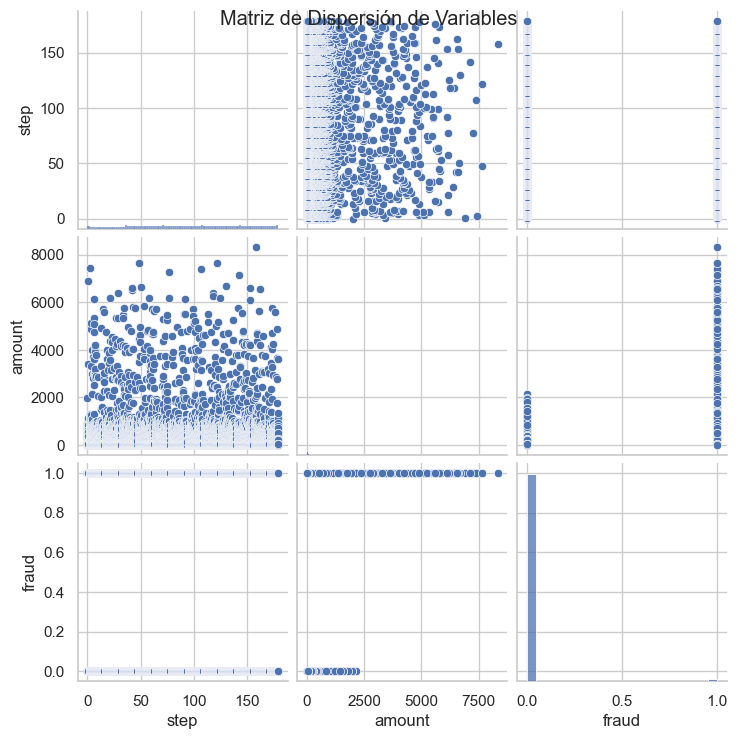

Matriz de Correlación de Pearson:
              step  customer       age    gender  merchant  category  \
step      1.000000  0.005082  0.001169 -0.001107 -0.156195 -0.017269   
customer  0.005082  1.000000  0.001940 -0.007568  0.013341  0.000166   
age       0.001169  0.001940  1.000000  0.005020  0.006973  0.004816   
gender   -0.001107 -0.007568  0.005020  1.000000 -0.007494  0.007700   
merchant -0.156195  0.013341  0.006973 -0.007494  1.000000 -0.245433   
category -0.017269  0.000166  0.004816  0.007700 -0.245433  1.000000   
amount   -0.007961  0.005823 -0.003930 -0.012888  0.065795 -0.098738   
fraud    -0.011898  0.005236 -0.004315 -0.025047  0.104532 -0.114272   

            amount     fraud  
step     -0.007961 -0.011898  
customer  0.005823  0.005236  
age      -0.003930 -0.004315  
gender   -0.012888 -0.025047  
merchant  0.065795  0.104532  
category -0.098738 -0.114272  
amount    1.000000  0.489967  
fraud     0.489967  1.000000  


In [79]:
# Calcular la correlación de Pearson
correlation_matrix = data_reduced.corr(method='pearson')

# Graficar la matriz de dispersión
sns.pairplot(Modelo_Base, kind='scatter')
plt.suptitle('Matriz de Dispersión de Variables')
plt.show()

# Imprimir la matriz de correlación de Pearson
print("Matriz de Correlación de Pearson:")
print(correlation_matrix)



## Ténicas de Balanceo de Datos

### Aplicación de SMOTE

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
y = data_reduced['fraud']

# Calcular la proporción deseada
minority_proportion = 0.4
# Obtener la cantidad de muestras en la clase mayoritaria
majority_count = y.value_counts().max()
# Calcular la cantidad de muestras objetivo para la clase minoritaria
target_minority_count = int(majority_count * minority_proportion)

# Definir la estrategia de sobremuestreo
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar SMote para balancear las clases
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_Smote = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_Smote['fraud'] = y_resampled

# Mostrar la distribución de clases después de aplicar SMOTE
distribucion_clases = Modelo_Limpio_Smote['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTE:")
print(distribucion_clases)








Distribución de clases después de aplicar SMOTE:
fraud
0    587443
1    234977
Name: count, dtype: int64


### Aplicación de SMOTE-TOMEK

In [4]:
import pandas as pd
from imblearn.combine import SMOTETomek

# Hacer una copia del DataFrame Modelo_Base para crear Modelo_Limpio
# Modelo_Limpio = Modelo_Base_Limpio.copy()

# Eliminar filas con valores NaN en el DataFrame 'Modelo_Limpio'
# Modelo_Limpio = Modelo_Limpio.dropna()

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(majority_count * 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica SMOTETomek con el nuevo valor de sampling_strategy
smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = smote_tomek.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_SmoteTomek = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_SmoteTomek['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar SMOTETomek
distribucion_clases = Modelo_Limpio_SmoteTomek['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTETomek:")
print(distribucion_clases)





Distribución de clases después de aplicar SMOTETomek:
fraud
0    587122
1    234656
Name: count, dtype: int64


### Aplicación de SMOTE-ENN

In [5]:
import pandas as pd
from imblearn.combine import SMOTEENN


# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_reduced.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_reduced['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(majority_count * 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica SMOTE-ENN con el nuevo valor de sampling_strategy
smote_enn = SMOTEENN(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_SMOTEENN = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_SMOTEENN['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar SMOTE-ENN
distribucion_clases = Modelo_Limpio_SMOTEENN['fraud'].value_counts()
print("Distribución de clases después de aplicar SMOTE-ENN:")
print(distribucion_clases)



Distribución de clases después de aplicar SMOTE-ENN:
fraud
0    571872
1    230062
Name: count, dtype: int64


### Aplicación de ROS

In [8]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_rfe.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_rfe['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(0.4 * majority_count)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: majority_count, 1: target_minority_count}

# Aplicar la técnica Random Over Sampling (ROS) con el nuevo valor de sampling_strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_ROS = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_ROS['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar ROS
distribucion_clases = Modelo_Limpio_ROS['fraud'].value_counts()
print("Distribución de clases después de aplicar Random Over Sampling (ROS):")
print(distribucion_clases)



Distribución de clases después de aplicar Random Over Sampling (ROS):
fraud
0    587443
1    234977
Name: count, dtype: int64


### Aplicación de RUS 

In [9]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_rfe.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_rfe['fraud']

# Calcular el número de muestras en la clase minoritaria
minority_count = Y.value_counts().min()

# Calcular el número objetivo de muestras para la clase mayoritaria
target_majority_count = int(minority_count / 0.4)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = {0: target_majority_count, 1: minority_count}

# Aplicar la técnica Random Under Sampling (RUS) con el nuevo valor de sampling_strategy
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_RUS = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_RUS['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar RUS
distribucion_clases = Modelo_Limpio_RUS['fraud'].value_counts()
print("Distribución de clases después de aplicar Random Under Sampling (RUS):")
print(distribucion_clases)




Distribución de clases después de aplicar Random Under Sampling (RUS):
fraud
0    18000
1     7200
Name: count, dtype: int64


### Aplicación de ADASYN

In [10]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Separar las variables predictoras (X) y la variable objetivo (Y)
X = data_rfe.drop(columns=['fraud'])  # Excluimos la columna 'fraud'
Y = data_rfe['fraud']

# Calcular el número de muestras en la clase mayoritaria
majority_count = Y.value_counts().max()

# Calcular el número objetivo de muestras para la clase minoritaria
target_minority_count = int(0.4 * majority_count)

# Calcular el nuevo valor para sampling_strategy
sampling_strategy = target_minority_count / Y.value_counts().sum()

# Aplicar la técnica ADASYN con el nuevo valor de sampling_strategy
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, Y_resampled = adasyn.fit_resample(X, Y)

# Crear un nuevo DataFrame con las variables balanceadas
Modelo_Limpio_ADASYN = pd.DataFrame(X_resampled, columns=X.columns)
Modelo_Limpio_ADASYN['fraud'] = Y_resampled

# Mostrar la distribución de clases después de aplicar ADASYN
distribucion_clases = Modelo_Limpio_ADASYN['fraud'].value_counts()
print("Distribución de clases después de aplicar ADASYN:")
print(distribucion_clases)



Distribución de clases después de aplicar ADASYN:
fraud
0    587443
1    231474
Name: count, dtype: int64


### Comparación de modelos de Balanceo

Distribución de clases en Original:
Clase
0    587443
1      7200
Name: count, dtype: int64

Distribución de clases en Smote:
Clase
0    587443
1    234977
Name: count, dtype: int64

Distribución de clases en SmoteTomek:
Clase
0    587122
1    234656
Name: count, dtype: int64

Distribución de clases en SMOTEENN:
Clase
0    571872
1    230062
Name: count, dtype: int64

Distribución de clases en ROS:
Clase
0    587443
1    234977
Name: count, dtype: int64

Distribución de clases en RUS:
Clase
0    18000
1     7200
Name: count, dtype: int64

Distribución de clases en ADASYN:
Clase
0    587443
1    231339
Name: count, dtype: int64



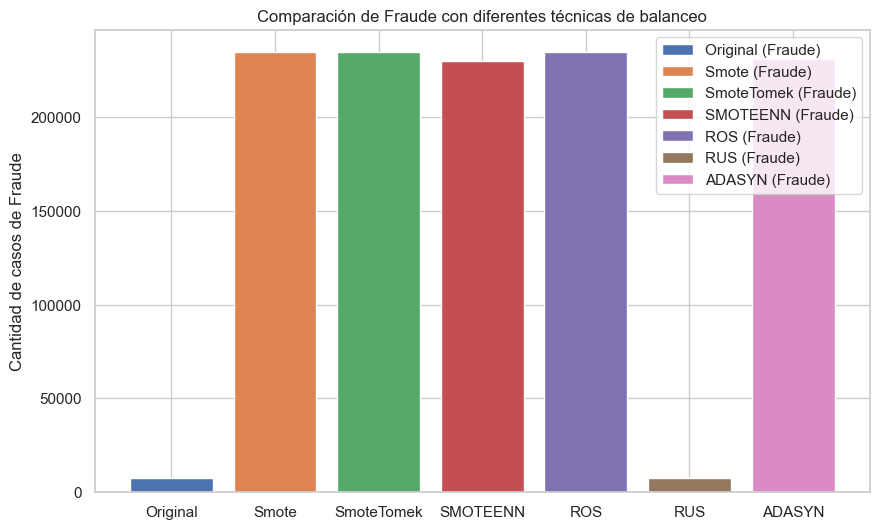

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrames para cada conjunto de datos
# Asegúrate de haber aplicado previamente SMOTE, SMOTE-Tomek y SMOTE-ENN a tus datos
# Puedes reemplazar los nombres de los DataFrames con los correctos
# Suponiendo que tienes los DataFrames: Modelo_Limpio, Modelo_Limpio_Smote, Modelo_Limpio_SmoteTomek, Modelo_Limpio_SMOTEENN

# Crear un DataFrame para cada conjunto
df_modelo_limpio = pd.DataFrame(data_reduced)
df_modelo_smote = pd.DataFrame(Modelo_Limpio_Smote)
df_modelo_tomek = pd.DataFrame(Modelo_Limpio_SmoteTomek)
df_modelo_smoteenn = pd.DataFrame(Modelo_Limpio_SMOTEENN)
df_modelo_ros = pd.DataFrame(Modelo_Limpio_ROS)
df_modelo_rus = pd.DataFrame(Modelo_Limpio_RUS)
df_modelo_adasyn = pd.DataFrame(Modelo_Limpio_ADASYN)

# Agregar etiquetas de clase (0 para "No Fraude" y 1 para "Fraude")
df_modelo_limpio['Clase'] = data_reduced['fraud']
df_modelo_smote['Clase'] = Modelo_Limpio_Smote['fraud']
df_modelo_tomek['Clase'] = Modelo_Limpio_SmoteTomek['fraud']
df_modelo_smoteenn['Clase'] = Modelo_Limpio_SMOTEENN['fraud']
df_modelo_ros['Clase'] = Modelo_Limpio_ROS['fraud']
df_modelo_rus['Clase'] = Modelo_Limpio_RUS['fraud']
df_modelo_adasyn['Clase'] = Modelo_Limpio_ADASYN['fraud']

# Comparar la distribución de clases en los diferentes conjuntos
distribucion_clases = {
    'Original': df_modelo_limpio['Clase'].value_counts(),
    'Smote': df_modelo_smote['Clase'].value_counts(),
    'SmoteTomek': df_modelo_tomek['Clase'].value_counts(),
    'SMOTEENN': df_modelo_smoteenn['Clase'].value_counts(),
    'ROS': df_modelo_ros['Clase'].value_counts(),
    'RUS': df_modelo_rus['Clase'].value_counts(),
    'ADASYN': df_modelo_adasyn['Clase'].value_counts()
}

# Mostrar la distribución de clases
for conjunto, distribucion in distribucion_clases.items():
    print(f"Distribución de clases en {conjunto}:\n{distribucion}\n")

# Crear una gráfica para visualizar la distribución de clases
plt.figure(figsize=(10, 6))
for conjunto, distribucion in distribucion_clases.items():
    plt.bar([conjunto], [distribucion[1]], label=f"{conjunto} (Fraude)")
plt.ylabel("Cantidad de casos de Fraude")
plt.title("Comparación de Fraude con diferentes técnicas de balanceo")
plt.legend()
plt.show()


# APLICACIÓN DE MACHINE LEARNING

## CASO 1 : SMOTE

### SMOTE - RANDOM FOREST

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_Smote['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.9838849574021384
Matriz de Confusión:
[[173370   2974]
 [  1002  69380]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    176344
           1       0.96      0.99      0.97     70382

    accuracy                           0.98    246726
   macro avg       0.98      0.98      0.98    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - KNN

In [43]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 9  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9796940735877046
Matriz de Confusión:
[[172176   4168]
 [   842  69540]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    176344
           1       0.94      0.99      0.97     70382

    accuracy                           0.98    246726
   macro avg       0.97      0.98      0.98    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - XGBOOST

In [59]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 100  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9777607548454561
Matriz de Confusión:
[[172984   3360]
 [  2127  68255]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    176344
           1       0.95      0.97      0.96     70382

    accuracy                           0.98    246726
   macro avg       0.97      0.98      0.97    246726
weighted avg       0.98      0.98      0.98    246726



### SMOTE - LIGHTGBM

In [70]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Ajustar el modelo LightGBM con Hiperparámetros Personalizados
params = {
    'max_depth': 10,  # Aumenta el valor según sea necesario
    'num_leaves': 127,
    'learning_rate': 0.1,
    'n_estimators':100  # Prueba con 0.01, 0.05, 0.1, 0.2, 0.3, etc.
      # Establece un valor más alto que 31
    # Otros hiperparámetros de LightGBM
}

clf = lgb.LGBMClassifier(**params)

# Entrenar el Modelo
try:
    clf.fit(X_train, Y_train)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



[LightGBM] [Info] Number of positive: 164595, number of negative: 411099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 575694, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285907 -> initscore=-0.915346
[LightGBM] [Info] Start training from score -0.915346
Precisión (Accuracy): 99.28%
Matriz de Confusión:
[[175252   1092]
 [   686  69696]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176344
           1       0.98      0.99      0.99     70382

    accuracy                           0.99    246726
   macro avg       0.99      0.99      0.99    246726
weighted avg       0.99      0.99      0.99    246726



### SMOTE - CATBOOST



In [75]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 6,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':1,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)


0:	learn: 0.4853725	total: 91.1ms	remaining: 45.5s
100:	learn: 0.0358572	total: 4.52s	remaining: 17.8s
200:	learn: 0.0281183	total: 9.09s	remaining: 13.5s
300:	learn: 0.0245983	total: 13.8s	remaining: 9.12s
400:	learn: 0.0226160	total: 18.3s	remaining: 4.52s
499:	learn: 0.0209952	total: 22.8s	remaining: 0us
Precisión (Accuracy): 0.992072177233044
Matriz de Confusión:
[[175213   1131]
 [   825  69557]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176344
           1       0.98      0.99      0.99     70382

    accuracy                           0.99    246726
   macro avg       0.99      0.99      0.99    246726
weighted avg       0.99      0.99      0.99    246726



### SMOTE - SVM

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVM con los hiperparámetros especificados
svm = SVC(kernel='rbf', C=1, gamma='auto', probability=True, random_state=42)

# Entrenar el modelo SVM
svm.fit(X_train_scaled, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9574074074074074
Matriz de Confusión:
[[5241  204]
 [ 118 1997]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5445
           1       0.91      0.94      0.93      2115

    accuracy                           0.96      7560
   macro avg       0.94      0.95      0.95      7560
weighted avg       0.96      0.96      0.96      7560



### CURVA ROC - SMOTE

[LightGBM] [Info] Number of positive: 164595, number of negative: 411099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 575694, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285907 -> initscore=-0.915346
[LightGBM] [Info] Start training from score -0.915346
0:	learn: 0.4865515	total: 50.9ms	remaining: 25.4s
100:	learn: 0.0354854	total: 4.84s	remaining: 19.1s
200:	learn: 0.0270115	total: 9.6s	remaining: 14.3s
300:	learn: 0.0241416	total: 14.7s	remaining: 9.69s
400:	learn: 0.0219972	total: 19.5s	remaining: 4.82s
499:	learn: 0.0205669	total: 24.8s	remaining: 0us


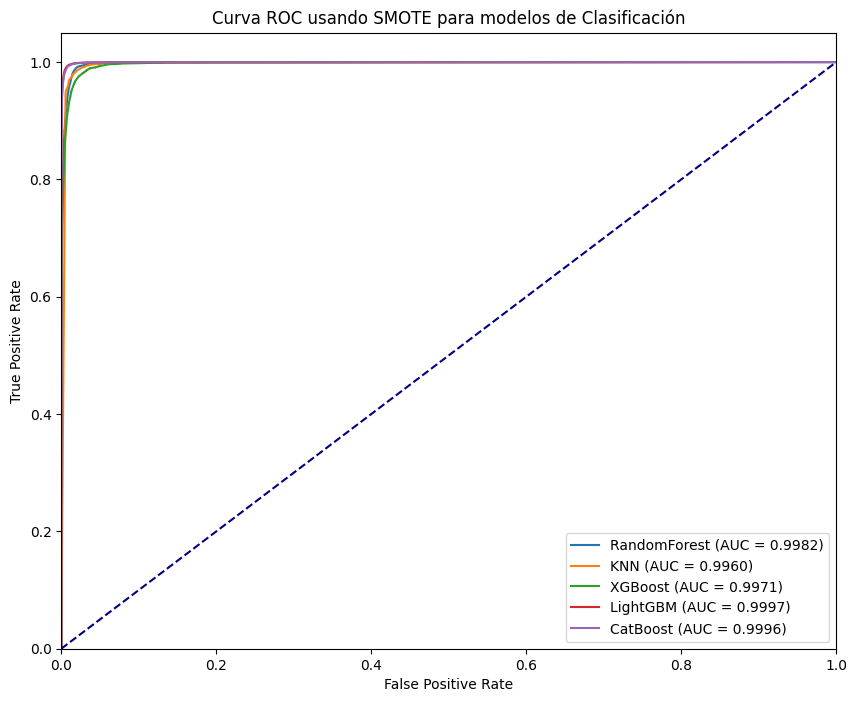

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Suponiendo que 'Modelo_Limpio_Smote' es tu DataFrame limpio
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar los modelos
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='ball_tree'),
    "XGBoost": XGBClassifier(subsample=0.6, colsample_bytree=1, n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, random_state=42),
    "LightGBM": LGBMClassifier(max_depth=10, num_leaves=127, learning_rate=0.1, n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=1, verbose=100, random_state=42)
}

# Diccionario para guardar las curvas ROC y AUC
roc_curves = {}
auc_scores = {}

# Entrenar los modelos y calcular las curvas ROC y AUC
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    roc_curves[name] = (fpr, tpr)
    auc_scores[name] = roc_auc

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_scores[name]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC usando SMOTE para modelos de Clasificación')
plt.legend(loc="lower right")
plt.show()


## CASO 2: SMOTE-ENN

### SMOTE-ENN - RANDOM FOREST

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_SMOTEENN['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.9880996421163766
Matriz de Confusión:
[[169386   2039]
 [   824  68332]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    171425
           1       0.97      0.99      0.98     69156

    accuracy                           0.99    240581
   macro avg       0.98      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - KNN

In [48]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 9  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9931540728486455
Matriz de Confusión:
[[170014   1411]
 [   236  68920]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    171425
           1       0.98      1.00      0.99     69156

    accuracy                           0.99    240581
   macro avg       0.99      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - XGBOOST

In [65]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 300  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9883573515780548
Matriz de Confusión:
[[169819   1606]
 [  1195  67961]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171425
           1       0.98      0.98      0.98     69156

    accuracy                           0.99    240581
   macro avg       0.98      0.99      0.99    240581
weighted avg       0.99      0.99      0.99    240581



### SMOTE-ENN - LIGHTGBM

In [69]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el espacio de hiperparámetros para LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 61, 127]
}

# Inicializar el modelo LightGBM
clf = lgb.LGBMClassifier()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 160906, number of negative: 400447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 561353, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286640 -> initscore=-0.911761
[LightGBM] [Info] Start training from score -0.911761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 127}
Precisión (Accuracy): 99.59%
Matriz de Confusión:
[[170807    618]
 [   369  68787]]
Reporte de Clasificación:
            

### SMOTE-ENN - CATBOOST

In [76]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 10,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':3,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

0:	learn: 0.4509419	total: 79.6ms	remaining: 39.7s
100:	learn: 0.0188440	total: 7.9s	remaining: 31.2s
200:	learn: 0.0138972	total: 15.5s	remaining: 23s
300:	learn: 0.0110328	total: 23s	remaining: 15.2s
400:	learn: 0.0091670	total: 30.6s	remaining: 7.54s
499:	learn: 0.0077550	total: 38.1s	remaining: 0us
Precisión (Accuracy): 0.9961218882621653
Matriz de Confusión:
[[170884    541]
 [   392  68764]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171425
           1       0.99      0.99      0.99     69156

    accuracy                           1.00    240581
   macro avg       0.99      1.00      1.00    240581
weighted avg       1.00      1.00      1.00    240581



### SMOTE-ENN - SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN ['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVM con los hiperparámetros especificados
svm = SVC(kernel='rbf', C=1, gamma='auto', probability=True, random_state=42)

# Entrenar el modelo SVM
svm.fit(X_train_scaled, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

### CURVA ROC - SMOTE-ENN

[LightGBM] [Info] Number of positive: 160906, number of negative: 400447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 561353, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286640 -> initscore=-0.911761
[LightGBM] [Info] Start training from score -0.911761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.4351583	total: 77.7ms	remaining: 38.8s
100:	learn: 0.0192012	total: 7.89s	remaining: 31.2s
200:	learn: 0.0139513	total: 15.6s	remaining: 23.3s
300:	learn: 0.0110713	total: 23.4s	remaining: 15.5s
400:	learn: 0.0090818	total: 31.3s	remaining: 7.73s
499:	learn: 0.0077101	total: 39s	remaining: 0us


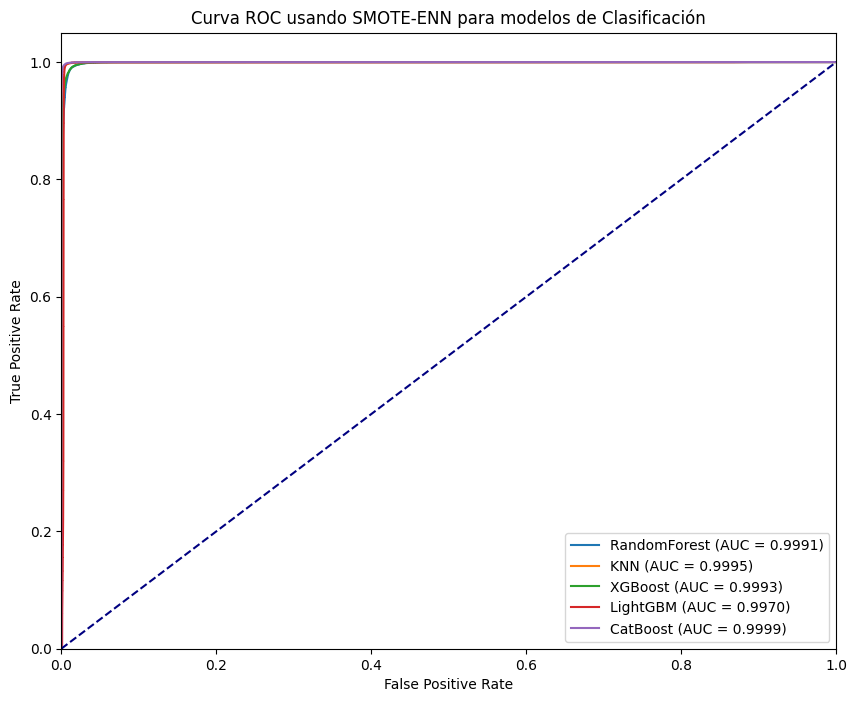

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Suponiendo que 'Modelo_Limpio_SMOTEENN' es tu DataFrame limpio
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar los modelos
models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='ball_tree'),
    "XGBoost": XGBClassifier(subsample=0.6, colsample_bytree=1, n_estimators=300, learning_rate=0.1, max_depth=3, min_child_weight=1, random_state=42),
    "LightGBM": LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=300, num_leaves=127, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, depth=10, learning_rate=0.1, l2_leaf_reg=3, verbose=100, random_state=42)
}

# Diccionario para guardar las curvas ROC y AUC
roc_curves = {}
auc_scores = {}

# Entrenar los modelos y calcular las curvas ROC y AUC
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    roc_curves[name] = (fpr, tpr)
    auc_scores[name] = roc_auc

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_scores[name]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC usando SMOTE-ENN para modelos de Clasificación')
plt.legend(loc="lower right")
plt.show()


## CASO 3: SMOTE-Tomek

### SMOTE-TOMEK - RANDOM FOREST

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar el conjunto de datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])  # Variables predictoras
Y = Modelo_Limpio_SmoteTomek['fraud']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)


# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print(f"Precisión (Accuracy): {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Precisión (Accuracy): 0.9950473362700479
Matriz de Confusión:
[[175277    791]
 [   430  70036]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176068
           1       0.99      0.99      0.99     70466

    accuracy                           1.00    246534
   macro avg       0.99      0.99      0.99    246534
weighted avg       1.00      1.00      1.00    246534



### SMOTE-TOMEK - KNN

In [47]:
#KNN ###############
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el número de vecinos (K) y otros hiperparámetros si es necesario
k_neighbors = 5  # Número de vecinos (ajusta según sea necesario)

# Crear el modelo KNN y entrenarlo
knn = KNeighborsClassifier(n_neighbors=k_neighbors,weights='distance',algorithm='ball_tree')
knn.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9830124850933339
Matriz de Confusión:
[[172451   3617]
 [   571  69895]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    176068
           1       0.95      0.99      0.97     70466

    accuracy                           0.98    246534
   macro avg       0.97      0.99      0.98    246534
weighted avg       0.98      0.98      0.98    246534



### SMOTE-TOMEK - XGBOOST

In [63]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Configurar los hiperparámetros del modelo XGBoost
n_estimators = 300  # Número de árboles en el ensamble (ajusta según sea necesario)
learning_rate = 0.1  # Tasa de aprendizaje (ajusta según sea necesario)
max_depth = 3  # Profundidad máxima de los árboles (ajusta según sea necesario)
min_child_weight = 1  # Mínimo peso de la muestra requerido para crear un nuevo nodo (ajusta según sea necesario)

# Crear y entrenar el modelo XGBoost
xgb = XGBClassifier(subsample=0.6,colsample_bytree=1,n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_child_weight=min_child_weight, random_state=42)
xgb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = xgb.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Precisión (Accuracy): 0.9850689965684246
Matriz de Confusión:
[[173779   2289]
 [  1392  69074]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176068
           1       0.97      0.98      0.97     70466

    accuracy                           0.99    246534
   macro avg       0.98      0.98      0.98    246534
weighted avg       0.99      0.99      0.99    246534



### SMOTE-TOMEK - LIGHTGBM

In [72]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el DataFrame "Modelo_Limpio"
# Asegúrate de haber aplicado las técnicas de preprocesamiento antes de cargar los datos.
# df = pd.read_csv("ruta/al/archivo.csv")

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Ajustar el modelo LightGBM con Hiperparámetros Personalizados
params = {
    'max_depth': 10,  # Aumenta el valor según sea necesario
    'num_leaves': 127,
    'learning_rate': 0.1,
    'n_estimators':100
}

clf = lgb.LGBMClassifier(**params)

# Entrenar el Modelo
try:
    clf.fit(X_train, Y_train)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy): {:.2f}%".format(accuracy * 100))

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)



[LightGBM] [Info] Number of positive: 160906, number of negative: 400447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 561353, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286640 -> initscore=-0.911761
[LightGBM] [Info] Start training from score -0.911761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Precisión (Accuracy): 99.48%
Matriz de Confusión:
[[170691    734]
 [   528  68628]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171425
           1       0.99      0.99      0.99     69156

    accuracy    

### SMOTE-TOMEK - CATBOOST

In [77]:
# Importar las bibliotecas necesarias
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que el DataFrame "Modelo_Limpio_Smote" ya está definido y contiene los datos preprocesados

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el modelo CatBoost con los hiperparámetros seleccionados
catboost_params = {
    'iterations': 500,  # Número de iteraciones
    'depth': 4,         # Profundidad máxima del árbol
    'learning_rate': 0.1,
    'l2_leaf_reg':1,  # Tasa de aprendizaje
    # 'loss_function': 'Logloss',  # Función de pérdida
    'verbose': 100       # Frecuencia de los mensajes de logging
}

clf = CatBoostClassifier(**catboost_params)

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

0:	learn: 0.5004440	total: 38.8ms	remaining: 19.4s
100:	learn: 0.0494891	total: 3.97s	remaining: 15.7s
200:	learn: 0.0382516	total: 8.09s	remaining: 12s
300:	learn: 0.0329408	total: 11.9s	remaining: 7.87s
400:	learn: 0.0300349	total: 15.8s	remaining: 3.89s
499:	learn: 0.0273199	total: 19.4s	remaining: 0us
Precisión (Accuracy): 0.9898796920505893
Matriz de Confusión:
[[174706   1362]
 [  1133  69333]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176068
           1       0.98      0.98      0.98     70466

    accuracy                           0.99    246534
   macro avg       0.99      0.99      0.99    246534
weighted avg       0.99      0.99      0.99    246534



### SMOTE-TOMEK - SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Elegir el kernel y otros hiperparámetros si es necesario
kernel = 'linear'  # Puedes seleccionar otros kernels como 'rbf', 'poly', etc.
C = 1.0  # Parámetro de regularización (ajusta según sea necesario)

# Crear el modelo SVM y entrenarlo
svm = SVC(kernel=kernel, C=C)
svm.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión (Accuracy):", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

### CURVA ROC - SMOTE-TOMEK

[LightGBM] [Info] Number of positive: 164190, number of negative: 411054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 575244, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285427 -> initscore=-0.917700
[LightGBM] [Info] Start training from score -0.917700
0:	learn: 0.4989364	total: 42.2ms	remaining: 21.1s
100:	learn: 0.0505562	total: 3.83s	remaining: 15.1s
200:	learn: 0.0392075	total: 7.6s	remaining: 11.3s
300:	learn: 0.0332993	total: 12s	remaining: 7.93s
400:	learn: 0.0296662	total: 15.9s	remaining: 3.93s
499:	learn: 0.0273787	total: 19.7s	remaining: 0us


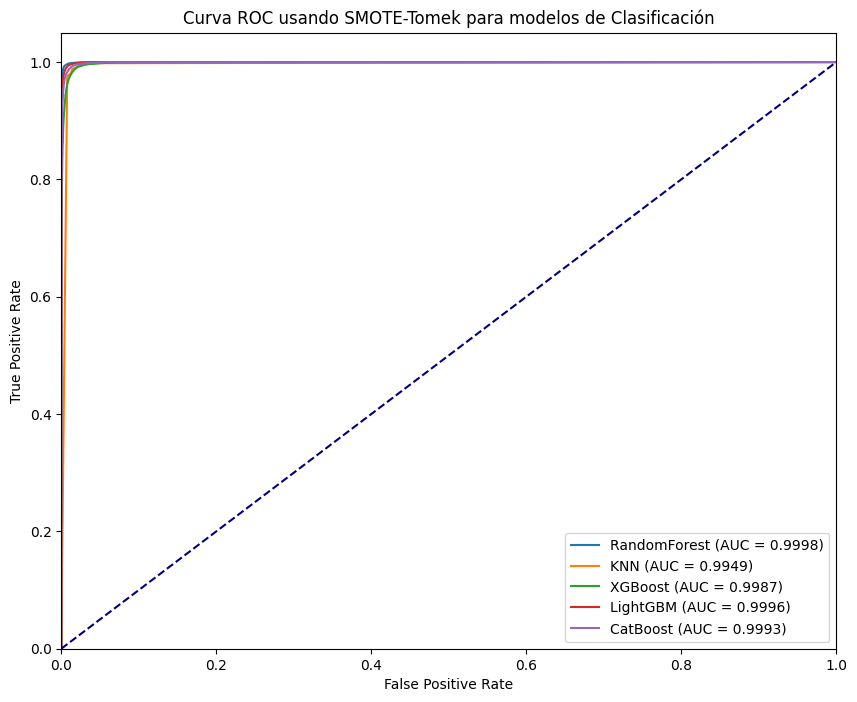

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Suponiendo que 'Modelo_Limpio_SmoteTomek' es tu DataFrame limpio
# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inicializar los modelos
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree'),
    "XGBoost": XGBClassifier(subsample=0.6, colsample_bytree=1, n_estimators=300, learning_rate=0.1, max_depth=3, min_child_weight=1, random_state=42),
    "LightGBM": LGBMClassifier(max_depth=10, num_leaves=127, learning_rate=0.1, n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, depth=4, learning_rate=0.1, l2_leaf_reg=1, verbose=100, random_state=42)
}

# Diccionario para guardar las curvas ROC y AUC
roc_curves = {}
auc_scores = {}

# Entrenar los modelos y calcular las curvas ROC y AUC
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    roc_curves[name] = (fpr, tpr)
    auc_scores[name] = roc_auc

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_scores[name]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC usando SMOTE-Tomek para modelos de Clasificación')
plt.legend(loc="lower right")
plt.show()


# APLICACIÓN DE ADABOOST

## CASO 1: SMOTE

### ADABOOST- DECISION TREE - SMOTE

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo DecisionTreeClassifier con los hiperparámetros seleccionados
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(estimator=decision_tree, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)

Resultados después de aplicar AdaBoost:
Precisión (Accuracy): 0.98
Matriz de Confusión:
[[173604   2740]
 [  2066  68316]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    176344
           1       0.96      0.97      0.97     70382

    accuracy                           0.98    246726
   macro avg       0.97      0.98      0.98    246726
weighted avg       0.98      0.98      0.98    246726



### ADABOOST - LOGISTIC REGRESION - SMOTE

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo LogisticRegression con los hiperparámetros ajustados y reponderación de clases
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(estimator=logistic_regression, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred, zero_division=1)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)






Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):
Precisión (Accuracy): 0.93
Matriz de Confusión:
[[170335   6009]
 [ 11276  59106]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    176344
           1       0.91      0.84      0.87     70382

    accuracy                           0.93    246726
   macro avg       0.92      0.90      0.91    246726
weighted avg       0.93      0.93      0.93    246726



### ADABOOST - GAUSIANNB - SMOTE

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-09)

# Inicializar el modelo de AdaBoost con GaussianNB como estimador base y usando el algoritmo SAMME
adaboost = AdaBoostClassifier(estimator=gaussian_nb, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con GaussianNB:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Resultados después de aplicar AdaBoost con GaussianNB:
Precisión (Accuracy): 0.92
Matriz de Confusión:
[[172625   3719]
 [ 14948  55434]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    176344
           1       0.94      0.79      0.86     70382

    accuracy                           0.92    246726
   macro avg       0.93      0.88      0.90    246726
weighted avg       0.93      0.92      0.92    246726



### CURVA ROC - ADABOOST - SMOTE

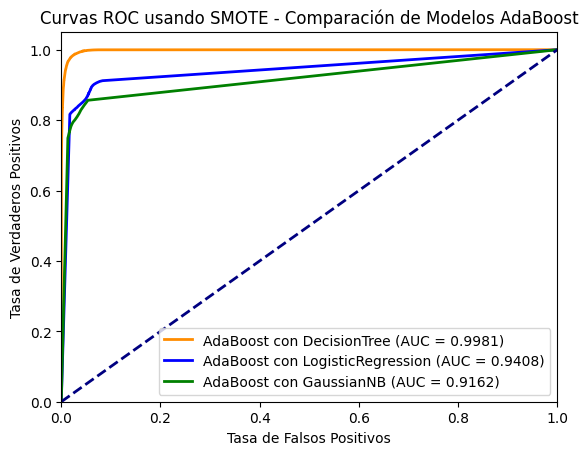

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_Smote.drop(columns=['fraud'])
Y = Modelo_Limpio_Smote['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo DecisionTreeClassifier con los hiperparámetros seleccionados
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
# Inicializar el modelo de AdaBoost con DecisionTreeClassifier como estimador base
adaboost_dt = AdaBoostClassifier(estimator=decision_tree, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
# Entrenar el modelo
adaboost_dt.fit(X_train, Y_train)
# Predecir las probabilidades para el conjunto de prueba
Y_pred_prob_dt = adaboost_dt.predict_proba(X_test)[:, 1]

# Crear el modelo LogisticRegression con los hiperparámetros ajustados y reponderación de clases
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
# Inicializar el modelo de AdaBoost con LogisticRegression como estimador base
adaboost_lr = AdaBoostClassifier(estimator=logistic_regression, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
# Entrenar el modelo
adaboost_lr.fit(X_train, Y_train)
# Predecir las probabilidades para el conjunto de prueba
Y_pred_prob_lr = adaboost_lr.predict_proba(X_test)[:, 1]

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-09)
# Inicializar el modelo de AdaBoost con GaussianNB como estimador base
adaboost_nb = AdaBoostClassifier(estimator=gaussian_nb, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
# Entrenar el modelo
adaboost_nb.fit(X_train, Y_train)
# Predecir las probabilidades para el conjunto de prueba
Y_pred_prob_nb = adaboost_nb.predict_proba(X_test)[:, 1]

# Calcular las curvas ROC
fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, _ = roc_curve(Y_test, Y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Visualizar las curvas ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='AdaBoost con DecisionTree (AUC = %0.4f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='AdaBoost con LogisticRegression (AUC = %0.4f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='AdaBoost con GaussianNB (AUC = %0.4f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC usando SMOTE - Comparación de Modelos AdaBoost')
plt.legend(loc="lower right")
plt.show()


## CASO 2: SMOTE-ENN

### ADABOOST - DECISION TREE - SMOTE-ENN

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo DecisionTreeClassifier con los hiperparámetros seleccionados
decision_tree = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1,
    criterion='gini',       # Función para medir la calidad de una división
    splitter='best',        # Estrategia para elegir la división en cada nodo
    max_features='sqrt',    # Número de características a considerar al buscar la mejor división
    random_state=42         # Semilla para el generador de números aleatorios
)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(
    estimator=decision_tree, 
    n_estimators=100, 
    learning_rate=0.1, 
    algorithm='SAMME', 
    random_state=42
)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con DecisionTreeClassifier:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Resultados después de aplicar AdaBoost con DecisionTreeClassifier:
Precisión (Accuracy): 0.98
Matriz de Confusión:
[[169436   1989]
 [  1911  67245]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171425
           1       0.97      0.97      0.97     69156

    accuracy                           0.98    240581
   macro avg       0.98      0.98      0.98    240581
weighted avg       0.98      0.98      0.98    240581



### ADABOOST - LOGISTIC REGRESION - SMOTE-ENN

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo LogisticRegression con los hiperparámetros ajustados y reponderación de clases
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(estimator=logistic_regression, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred, zero_division=1)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):
Precisión (Accuracy): 0.94
Matriz de Confusión:
[[166520   4905]
 [  8681  60475]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    171425
           1       0.92      0.87      0.90     69156

    accuracy                           0.94    240581
   macro avg       0.94      0.92      0.93    240581
weighted avg       0.94      0.94      0.94    240581



### ADABOOST - GAUSIANNB - SMOTE-ENN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05) #'estimator__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05],

# Inicializar el modelo de AdaBoost con GaussianNB como estimador base y usando el algoritmo SAMME
adaboost = AdaBoostClassifier(estimator=gaussian_nb, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con GaussianNB:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)

Resultados después de aplicar AdaBoost con GaussianNB:
Precisión (Accuracy): 0.95
Matriz de Confusión:
[[169616   1809]
 [ 11380  57776]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    171425
           1       0.97      0.84      0.90     69156

    accuracy                           0.95    240581
   macro avg       0.95      0.91      0.93    240581
weighted avg       0.95      0.95      0.94    240581



### CURVA ROC - ADABOOST - SMOTE-ENN

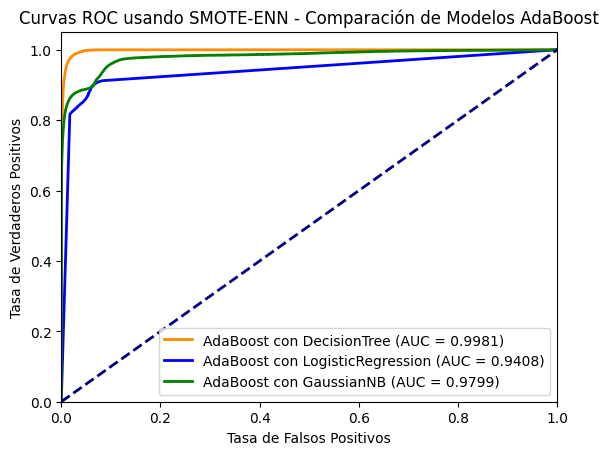

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SMOTEENN.drop(columns=['fraud'])
Y = Modelo_Limpio_SMOTEENN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo DecisionTreeClassifier con AdaBoost
decision_tree = DecisionTreeClassifier(max_depth=9, criterion='gini',splitter='best',max_features='sqrt',  min_samples_split=2, min_samples_leaf=1)
adaboost = AdaBoostClassifier(estimator=decision_tree, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
adaboost.fit(X_train, Y_train)
y_score_adaboost = adaboost.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo LogisticRegression
logistic_regression = LogisticRegression(max_iter=750, random_state=42)
logistic_regression.fit(X_train, Y_train)
y_score_logistic = logistic_regression.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05)
gaussian_nb.fit(X_train, Y_train)
y_score_nb = gaussian_nb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(Y_test, y_score_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Calcular la curva ROC para LogisticRegression
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, y_score_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calcular la curva ROC para GaussianNB
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot de las curvas ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='AdaBoost con DecisionTree (AUC = %0.4f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='AdaBoost con LogisticRegression (AUC = %0.4f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='AdaBoost con GaussianNB (AUC = %0.4f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC usando SMOTE-ENN - Comparación de Modelos AdaBoost')
plt.legend(loc="lower right")
plt.show()


## CASO 3: SMOTE-TOMEK

### ADABOOST - DECISION TREE - SMOTE-TOMEK

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo DecisionTreeClassifier con los hiperparámetros seleccionados
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(estimator=decision_tree, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Resultados después de aplicar AdaBoost:
Precisión (Accuracy): 0.98
Matriz de Confusión:
[[173288   2780]
 [  1994  68472]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    176068
           1       0.96      0.97      0.97     70466

    accuracy                           0.98    246534
   macro avg       0.97      0.98      0.98    246534
weighted avg       0.98      0.98      0.98    246534



### ADABOOST - LOGISTIC REGRESION - SMOTE-TOMEK

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo LogisticRegression con los hiperparámetros ajustados y reponderación de clases
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Inicializar el modelo de AdaBoost con los hiperparámetros seleccionados
adaboost = AdaBoostClassifier(estimator=logistic_regression, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred, zero_division=1)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Resultados después de aplicar AdaBoost con LogisticRegression (class_weight='balanced'):
Precisión (Accuracy): 0.93
Matriz de Confusión:
[[170122   5946]
 [ 11230  59236]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    176068
           1       0.91      0.84      0.87     70466

    accuracy                           0.93    246534
   macro avg       0.92      0.90      0.91    246534
weighted avg       0.93      0.93      0.93    246534



### ADABOOST - GAUSIANNB - SMOTE-TOMEK

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-08) #'estimator__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05],

# Inicializar el modelo de AdaBoost con GaussianNB como estimador base y usando el algoritmo SAMME
adaboost = AdaBoostClassifier(estimator=gaussian_nb, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)

# Entrenar el modelo AdaBoost en los datos de entrenamiento
adaboost.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = adaboost.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar AdaBoost con GaussianNB:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)

Resultados después de aplicar AdaBoost con GaussianNB:
Precisión (Accuracy): 0.92
Matriz de Confusión:
[[172465   3603]
 [ 14945  55521]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    176068
           1       0.94      0.79      0.86     70466

    accuracy                           0.92    246534
   macro avg       0.93      0.88      0.90    246534
weighted avg       0.93      0.92      0.92    246534



### CURVA ROC - ADABOOST - SMOTE-TOMEK

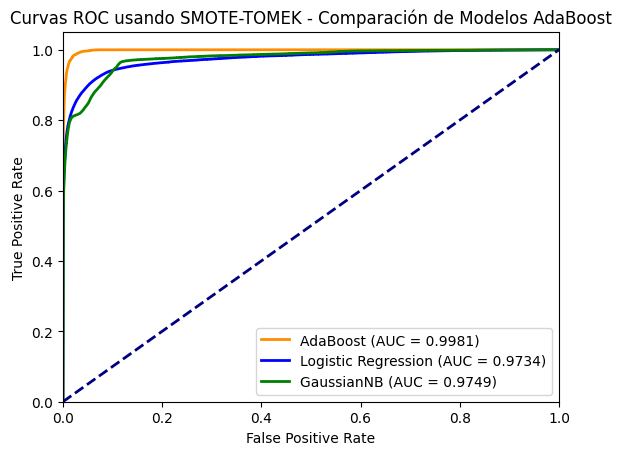

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_SmoteTomek.drop(columns=['fraud'])
Y = Modelo_Limpio_SmoteTomek['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo DecisionTreeClassifier con AdaBoost
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
adaboost = AdaBoostClassifier(estimator=decision_tree, n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
adaboost.fit(X_train, Y_train)
y_score_adaboost = adaboost.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, Y_train)
y_score_logistic = logistic_regression.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-08)
gaussian_nb.fit(X_train, Y_train)
y_score_nb = gaussian_nb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(Y_test, y_score_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Calcular la curva ROC para LogisticRegression
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, y_score_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calcular la curva ROC para GaussianNB
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot de las curvas ROC
plt.figure()
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label='AdaBoost (AUC = %0.4f)' % roc_auc_adaboost)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.4f)' % roc_auc_logistic)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='GaussianNB (AUC = %0.4f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC usando SMOTE-TOMEK - Comparación de Modelos AdaBoost')
plt.legend(loc='lower right')
plt.show()


# APLICACIÓN DE RFE

Características seleccionadas y sus importancias:
    Feature  Importance
0      step    0.012075
1  customer    0.011464
2  merchant    0.237008
3  category    0.101516
4    amount    0.637938


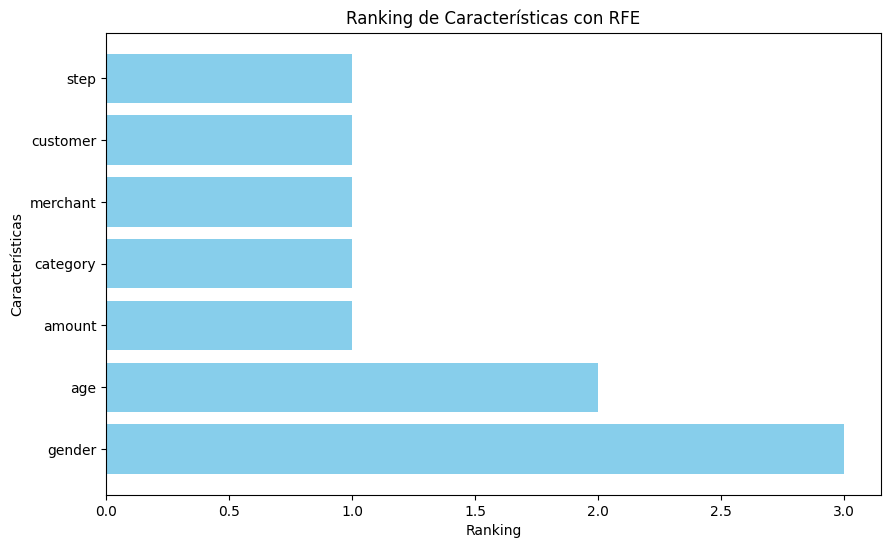

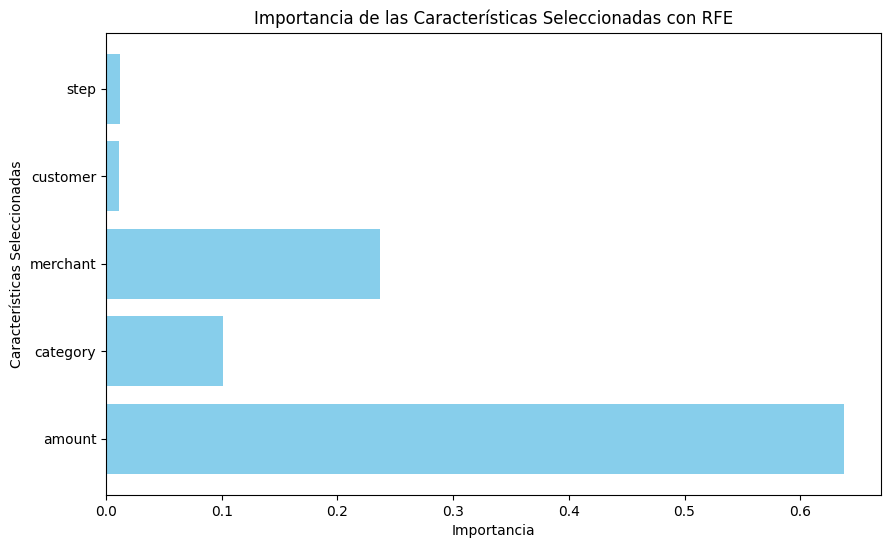

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Supongamos que 'data_reduced' es tu DataFrame con los datos.
# Separar los datos en variables predictoras y objetivo
X = data_reduced.drop(columns=['fraud'])
Y = data_reduced['fraud']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar el modelo RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

# Aplicar RFE para seleccionar características
n_features_to_select = 5  # Número de características que queremos seleccionar
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
rfe.fit(X_scaled, Y)

# Obtener las características seleccionadas
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

# Crear un DataFrame con las características, sus rankings y sus importancias
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Reentrenar el modelo sobre las características seleccionadas para obtener las importancias
rf_selected = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)
rf_selected.fit(X_scaled[:, rfe.support_], Y)
importances = rf_selected.feature_importances_

# Crear un DataFrame con las características seleccionadas y sus importancias
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

print("Características seleccionadas y sus importancias:")
print(feature_importance)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.ylabel('Características')
plt.title('Ranking de Características con RFE')
plt.gca().invert_yaxis()
plt.show()

# Visualizar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características Seleccionadas')
plt.title('Importancia de las Características Seleccionadas con RFE')
plt.gca().invert_yaxis()
plt.show()



In [7]:
# Crear un nuevo DataFrame con las características seleccionadas y la variable objetivo
data_rfe = pd.DataFrame(X[selected_features], columns=selected_features)
data_rfe['fraud'] = Y.values

# Mostrar el nuevo DataFrame
data_rfe=data_rfe

## CASO 1: ROS

### ROS - GAUSSIANNB

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ROS.drop(columns=['fraud'])
Y = Modelo_Limpio_ROS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05)

# Entrenar el modelo GaussianNB en los datos de entrenamiento
gaussian_nb.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = gaussian_nb.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar GaussianNB:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Resultados después de aplicar GaussianNB:
Precisión (Accuracy): 0.94
Matriz de Confusión:
[[172953   3391]
 [ 12484  57898]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    176344
           1       0.94      0.82      0.88     70382

    accuracy                           0.94    246726
   macro avg       0.94      0.90      0.92    246726
weighted avg       0.94      0.94      0.93    246726



### ROS - MULTILAYER PERCEPTRON

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ROS.drop(columns=['fraud'])
Y = Modelo_Limpio_ROS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir los hiperparámetros del modelo MLP
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'relu',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}

# Crear el modelo MLPClassifier
mlp = MLPClassifier(**mlp_params)

# Entrenar el modelo MLPClassifier en los datos de entrenamiento
mlp.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = mlp.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

# Calcular la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.96
Matriz de Confusión:
[[171276   5068]
 [  5435  64947]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    176344
           1       0.93      0.92      0.93     70382

    accuracy                           0.96    246726
   macro avg       0.95      0.95      0.95    246726
weighted avg       0.96      0.96      0.96    246726



### ROS - LOGISTIC REGRESION

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ROS.drop(columns=['fraud'])
Y = Modelo_Limpio_ROS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el espacio de hiperparámetros para LogisticRegression
param_grid = [
    {'penalty': ['l1', 'l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['liblinear', 'saga'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['newton-cg', 'lbfgs', 'sag'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['elasticnet'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['saga'],
     'l1_ratio': [0.25, 0.5, 0.75],
     'max_iter': [100, 200, 500, 1000]}
]
# Crear el modelo LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:
Precisión (Accuracy): 0.93
Matriz de Confusión:
[[172748   3596]
 [ 12521  57861]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    176344
           1       0.94      0.82      0.88     70382

    accuracy                           0.93    246726
   macro avg       0.94      0.90      0.92    246726
weighted avg       0.94      0.93      0.93    246726



### CURVA ROC - ROS

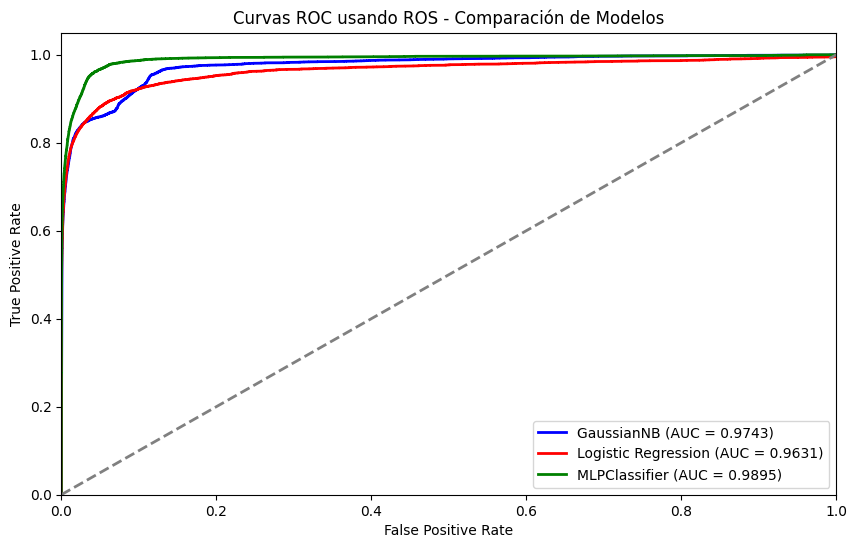

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ROS.drop(columns=['fraud'])
Y = Modelo_Limpio_ROS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05)
gaussian_nb.fit(X_train, Y_train)
y_pred_proba_gnb = gaussian_nb.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo LogisticRegression
logistic_params = {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
logistic_regression = LogisticRegression(**logistic_params, random_state=42)
logistic_regression.fit(X_train, Y_train)
y_pred_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'relu',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}
mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train, Y_train)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para cada modelo
fpr_gnb, tpr_gnb, _ = roc_curve(Y_test, y_pred_proba_gnb)
roc_auc_gnb = roc_auc_score(Y_test, y_pred_proba_gnb)

fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(Y_test, y_pred_proba_lr)

fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, y_pred_proba_mlp)
roc_auc_mlp = roc_auc_score(Y_test, y_pred_proba_mlp)

# Plotear la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'GaussianNB (AUC = {roc_auc_gnb:.4f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLPClassifier (AUC = {roc_auc_mlp:.4f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC usando ROS - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()


## CASO 2: RUS

### RUS - GAUSSIANNB

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_RUS.drop(columns=['fraud'])
Y = Modelo_Limpio_RUS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB()

# Definir el espacio de hiperparámetros para GaussianNB
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=gaussian_nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar GaussianNB con Grid Search y CV de 5:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mejores hiperparámetros: {'var_smoothing': 1e-05}
Resultados después de aplicar GaussianNB con Grid Search y CV de 5:
Precisión (Accuracy): 0.94
Matriz de Confusión:
[[5329  116]
 [ 374 1741]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5445
           1       0.94      0.82      0.88      2115

    accuracy                           0.94      7560
   macro avg       0.94      0.90      0.92      7560
weighted avg       0.94      0.94      0.93      7560



### RUS - MULTILAYER PERCEPTRON

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_RUS.drop(columns=['fraud'])
Y = Modelo_Limpio_RUS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir los hiperparámetros del modelo MLP
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'tanh',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}

# Crear el modelo MLPClassifier
mlp = MLPClassifier(**mlp_params)

# Entrenar el modelo MLPClassifier en los datos de entrenamiento
mlp.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = mlp.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

# Calcular la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.93
Matriz de Confusión:
[[5243  202]
 [ 364 1751]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5445
           1       0.90      0.83      0.86      2115

    accuracy                           0.93      7560
   macro avg       0.92      0.90      0.90      7560
weighted avg       0.92      0.93      0.92      7560



### RUS - LOGISTIC REGRESSION

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_RUS.drop(columns=['fraud'])
Y = Modelo_Limpio_RUS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el espacio de hiperparámetros para LogisticRegression
param_grid = [
    {'penalty': ['l1', 'l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['liblinear', 'saga'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['newton-cg', 'lbfgs', 'sag'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['elasticnet'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['saga'],
     'l1_ratio': [0.25, 0.5, 0.75],
     'max_iter': [100, 200, 500, 1000]}
]
# Crear el modelo LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores hiperparámetros: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:
Precisión (Accuracy): 0.93
Matriz de Confusión:
[[5321  124]
 [ 397 1718]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5445
           1       0.93      0.81      0.87      2115

    accuracy                           0.93      7560
   macro avg       0.93      0.89      0.91      7560
weighted avg       0.93      0.93      0.93      7560



### CURVA ROC - RUS

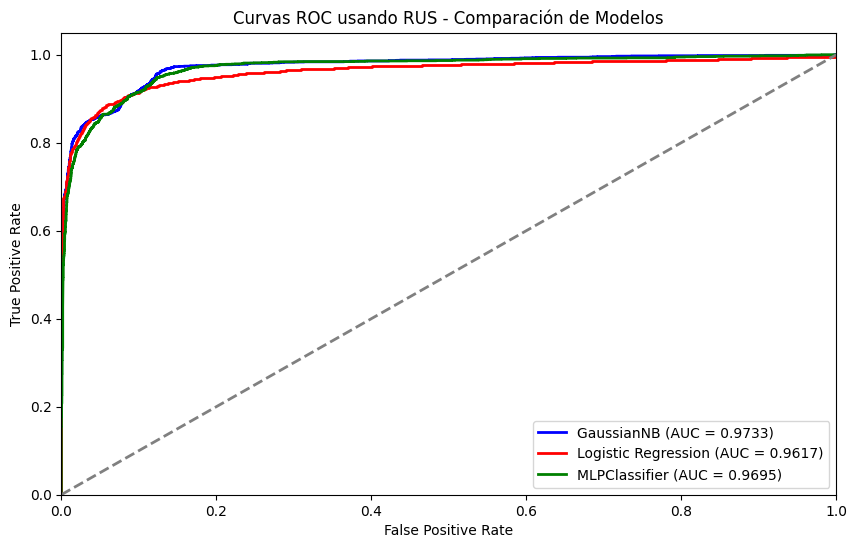

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_RUS.drop(columns=['fraud'])
Y = Modelo_Limpio_RUS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05)
gaussian_nb.fit(X_train, Y_train)
y_pred_proba_gnb = gaussian_nb.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo LogisticRegression
logistic_params = {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
logistic_regression = LogisticRegression(**logistic_params, random_state=42)
logistic_regression.fit(X_train, Y_train)
y_pred_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'tanh',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}
mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train, Y_train)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para cada modelo
fpr_gnb, tpr_gnb, _ = roc_curve(Y_test, y_pred_proba_gnb)
roc_auc_gnb = roc_auc_score(Y_test, y_pred_proba_gnb)

fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(Y_test, y_pred_proba_lr)

fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, y_pred_proba_mlp)
roc_auc_mlp = roc_auc_score(Y_test, y_pred_proba_mlp)

# Plotear la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'GaussianNB (AUC = {roc_auc_gnb:.4f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLPClassifier (AUC = {roc_auc_mlp:.4f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC usando RUS - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()

## CASO 3: ADASYN

### ADASYN - GAUSSIANNB

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ADASYN.drop(columns=['fraud'])
Y = Modelo_Limpio_ADASYN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB()

# Definir el espacio de hiperparámetros para GaussianNB
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=gaussian_nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar GaussianNB con Grid Search y CV de 5:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mejores hiperparámetros: {'var_smoothing': 1e-05}
Resultados después de aplicar GaussianNB con Grid Search y CV de 5:
Precisión (Accuracy): 0.87
Matriz de Confusión:
[[170454   5777]
 [ 24958  44487]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    176231
           1       0.89      0.64      0.74     69445

    accuracy                           0.87    245676
   macro avg       0.88      0.80      0.83    245676
weighted avg       0.88      0.87      0.87    245676



### ADASYN - MULTILAYER PERCEPTRON

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ADASYN.drop(columns=['fraud'])
Y = Modelo_Limpio_ADASYN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir los hiperparámetros del modelo MLP
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'relu',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}

# Crear el modelo MLPClassifier
mlp = MLPClassifier(**mlp_params)

# Entrenar el modelo MLPClassifier en los datos de entrenamiento
mlp.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Y_pred = mlp.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

# Calcular la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)


Precisión (Accuracy): 0.95
Matriz de Confusión:
[[169503   6728]
 [  4389  65056]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    176231
           1       0.91      0.94      0.92     69445

    accuracy                           0.95    245676
   macro avg       0.94      0.95      0.94    245676
weighted avg       0.96      0.95      0.95    245676



### ADASYN - LOGISTIC REGRESSION

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_ADASYN.drop(columns=['fraud'])
Y = Modelo_Limpio_ADASYN['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definir el espacio de hiperparámetros para LogisticRegression
param_grid = [
    {'penalty': ['l1', 'l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['liblinear', 'saga'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['l2'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['newton-cg', 'lbfgs', 'sag'],
     'max_iter': [100, 200, 500, 1000]},
    
    {'penalty': ['elasticnet'],
     'C': [0.01, 0.1, 1.0, 10, 100],
     'solver': ['saga'],
     'l1_ratio': [0.25, 0.5, 0.75],
     'max_iter': [100, 200, 500, 1000]}
]
# Crear el modelo LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones en los datos de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Imprimir métricas de rendimiento
print("Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(classification_rep)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores hiperparámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Resultados después de aplicar LogisticRegression con Grid Search y CV de 5:
Precisión (Accuracy): 0.88
Matriz de Confusión:
[[167017   9214]
 [ 20945  48500]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    176231
           1       0.84      0.70      0.76     69445

    accuracy                           0.88    245676
   macro avg       0.86      0.82      0.84    245676
weighted avg       0.87      0.88      0.87    245676



### CURVA ROC - ADASYN

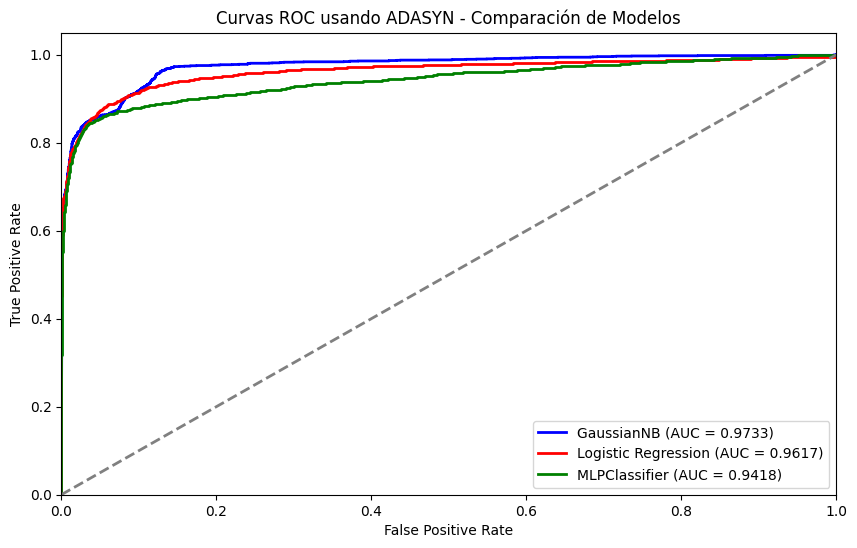

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento (70%) y prueba (30%)
X = Modelo_Limpio_RUS.drop(columns=['fraud'])
Y = Modelo_Limpio_RUS['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB(var_smoothing=1e-05)
gaussian_nb.fit(X_train, Y_train)
y_pred_proba_gnb = gaussian_nb.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo LogisticRegression
logistic_params = {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
logistic_regression = LogisticRegression(**logistic_params, random_state=42)
logistic_regression.fit(X_train, Y_train)
y_pred_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Crear y entrenar el modelo MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,),  # Tamaño de las capas ocultas
    'activation': 'relu',  # Función de activación
    'solver': 'adam',  # Algoritmo de optimización
    'alpha': 0.0001,  # Parámetro de regularización
    'batch_size': 'auto',  # Tamaño del batch para entrenamiento
    'learning_rate': 'constant',  # Tasa de aprendizaje
    'learning_rate_init': 0.001,  # Tasa de aprendizaje inicial
    'max_iter': 200,  # Número máximo de iteraciones
    'random_state': 42  # Semilla para la reproducibilidad
}
mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train, Y_train)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para cada modelo
fpr_gnb, tpr_gnb, _ = roc_curve(Y_test, y_pred_proba_gnb)
roc_auc_gnb = roc_auc_score(Y_test, y_pred_proba_gnb)

fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(Y_test, y_pred_proba_lr)

fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, y_pred_proba_mlp)
roc_auc_mlp = roc_auc_score(Y_test, y_pred_proba_mlp)

# Plotear la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'GaussianNB (AUC = {roc_auc_gnb:.4f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLPClassifier (AUC = {roc_auc_mlp:.4f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC usando ADASYN - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()